In [1]:
import sys
sys.path.insert(0, '..')

from utils import data
import os
import sklearn
import numpy as np
from sklearn.neighbors import (
    KNeighborsClassifier,
    DistanceMetric
)
import json
import matplotlib.pyplot as plt

In [2]:

# ------------ HYPERPARAMETERS -------------
BASE_PATH = '../COVID-19/csse_covid_19_data/'
N_NEIGHBORS = 5
MIN_CASES = 500000
NORMALIZE = True
# ------------------------------------------

confirmed = os.path.join(
    BASE_PATH, 
    'csse_covid_19_time_series',
    'time_series_covid19_confirmed_global.csv')
confirmed = data.load_csv_data(confirmed)
features = []
targets = []

for val in np.unique(confirmed["Country/Region"]):
    df = data.filter_by_attribute(
        confirmed, "Country/Region", val)
    cases, labels = data.get_cases_chronologically(df)
    features.append(cases)
    targets.append(labels)

features = np.concatenate(features, axis=0)
targets = np.concatenate(targets, axis=0)
print(targets)
predictions = {}

[[nan 'Afghanistan' 33.0 65.0]
 [nan 'Albania' 41.1533 20.1683]
 [nan 'Algeria' 28.0339 1.6596]
 ...
 [nan 'Yemen' 15.552727 48.516388]
 [nan 'Zambia' -15.4167 28.2833]
 [nan 'Zimbabwe' -20.0 30.0]]


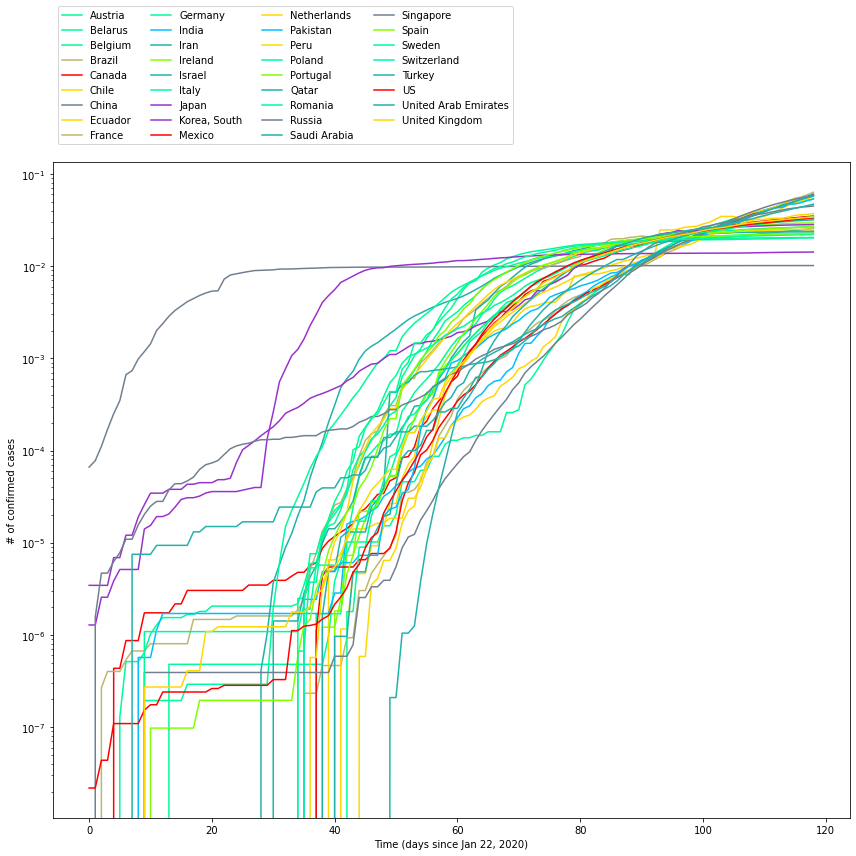

In [4]:
def categorize(lat):
    if lat<-150:
        return 0
    if lat>=-150 and lat<-120:
        return 1
    if lat>=-120 and lat<-90:
        return 2
    if lat>=-90 and lat<-60:
        return 3
    if lat>=-60 and lat<-30:
        return 4
    if lat>=-30 and lat<0:
        return 5
    if lat>=0 and lat<30:
        return 6
    if lat>=30 and lat<60:
        return 7
    if lat>=60 and lat<90:
        return 8
    if lat>=90 and lat<120:
        return 9
    if lat>=120 and lat<150:
        return 10
    if lat>=150:
        return 11

confirmed = os.path.join(
    BASE_PATH, 
    'csse_covid_19_time_series',
    'time_series_covid19_confirmed_global.csv')
confirmed = data.load_csv_data(confirmed)
features = []
targets = []

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)


colors = ["maroon","firebrick","red","gold","darkkhaki","chartreuse","mediumspringgreen","lightseagreen","deepskyblue",
         "slategray","darkorchid","m"]
legend = []
handles = []
all_lat=["-180 -- -150","-150 -- -120","-120 -- -90", "-90 -- -60","-60 -- -30", "-30 -- 0", "0 -- 30",
        "30 -- 60", "60 -- 90", "90 -- 120", "120 -- 150", "150 -- 180"]

for val in np.unique(confirmed["Country/Region"]):
    df = data.filter_by_attribute(
        confirmed, "Country/Region", val)
    cases, labels = data.get_cases_chronologically(df)
    cases = cases.sum(axis=0)

    if cases.sum() > MIN_CASES:
        N_Cases=cases/cases.sum(axis=-1,keepdims=True)
        lon=labels[0,3]
        i=categorize(lon)
        lines = ax.plot(N_Cases, label=labels[0,1])
        handles.append(lines[0])
        legend.append(labels[0,1])
        #lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])
        lines[0].set_color(colors[i])



ax.set_ylabel('# of confirmed cases')
ax.set_xlabel("Time (days since Jan 22, 2020)")

ax.set_yscale('log')
ax.legend(handles, legend, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4)
plt.tight_layout()
#plt.show()
plt.savefig('Lon.png',facecolor="white",dpi=300)

    
